In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis/')

In [2]:
import pandas as pd
import TimeSeriesAnalysis.tsa_lth.analysis as analysis
import TimeSeriesAnalysis.tsa_lth.modelling as modelling
import TimeSeriesAnalysis.tsa_lth.tests as tests
from TimeSeriesAnalysis.tsa_lth.tools import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pylab

# 2.1 Working with time series

In [3]:
A1 = [1, -1.79, 0.84 ] 
C1 = [1, -0.18, -0.11 ]

A2 = [ 1, -1.79 ]
C2 = [ 1, -0.18, -0.11 ]

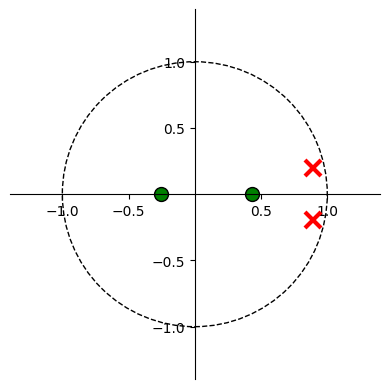

In [4]:
# Plots the roots of A1 and C1
analysis.pzmap(C1,A1)

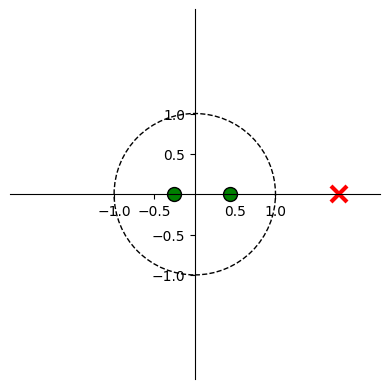

In [35]:
# Plots the roots of A2 and C2
# Notice that the roots of A2 is outside the unit circle, this shows that the data will be unstable.
analysis.pzmap(C2,A2)

## Question 1

In [6]:
random.seed(10)

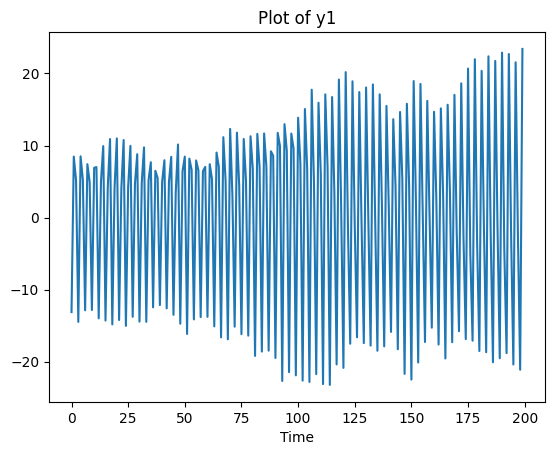

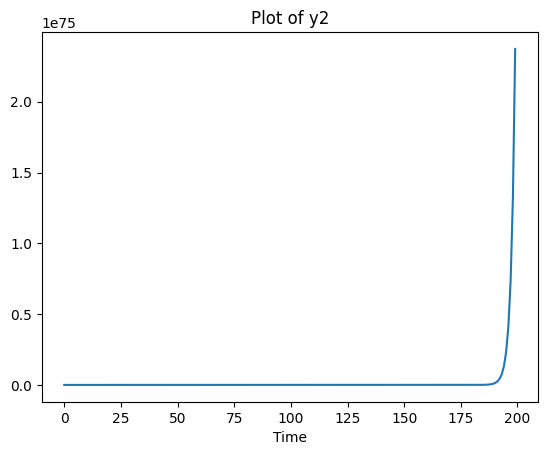

In [36]:
# Simulating and plotting for y1 with polynomials A1, C1 and y2 with polynomials A2, C2
sigma = 1
N = 300
e1 = np.sqrt(sigma) * np.random.randn(N)
y1 = modelling.filter(C1,A1,e1)
y1 = y1[100:]

e2 = np.sqrt(sigma) * np.random.randn(N)
y2 = modelling.filter(C2,A2,e2)
y2 = y2[100:]
plt.plot(y1)
plt.title("Plot of y1")
plt.xlabel("Time")
plt.show()
plt.plot(y2)
plt.title("Plot of y2")
plt.xlabel("Time")
plt.show()

In [8]:
print(f'Zeros of y1: {np.roots(C1)}')
print(f'Poles of y1: {np.roots(A1)}')
print(f'Zeros of y2: {np.roots(C2)}')
print(f'Poles of y2: {np.roots(A2)}')

Zeros of y1: [ 0.43365681 -0.25365681]
Poles of y1: [0.895+0.19742087j 0.895-0.19742087j]
Zeros of y2: [ 0.43365681 -0.25365681]
Poles of y2: [1.79]


We see that absolute value of the Poles of y2 is greater than 1. Hence, the process of y2 is unstable and goes to +infinity or -infinity.

## Question 3

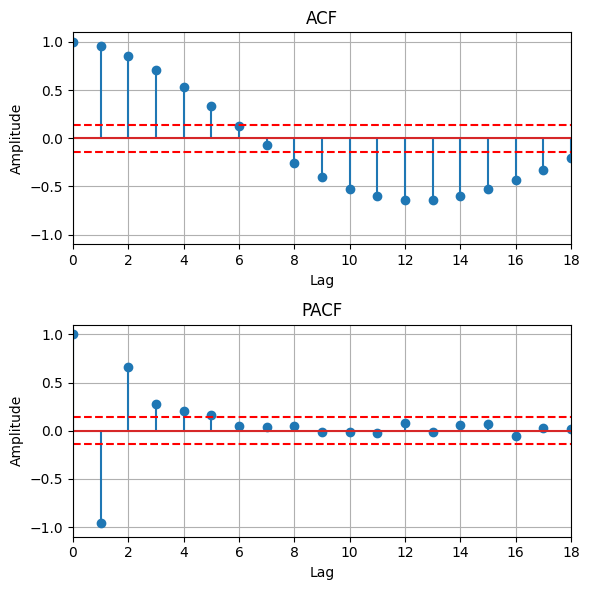

In [11]:
analysis.plotACFnPACF(y1)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.7917(±0.0366)·z⁻¹ + 0.8554(±0.0365)·z⁻²

Polynomial orders: nA = 2
Number of free coefficients: 2
Fit to estimation data (NRMSE): 86.58%
FPE : 1.02  MSE : 1.001
AIC : 566.003   BIC : 572.579



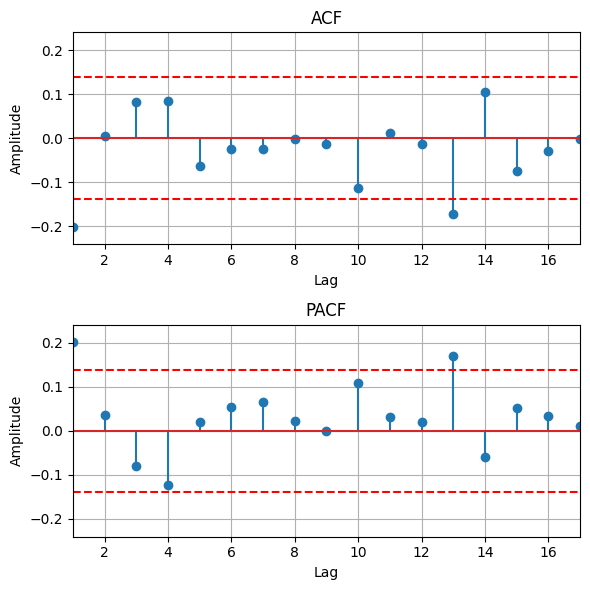

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 25.09 < 31.41)
  McLeod-Li test:        True (white if 24.68 < 31.41)
  Monti test:            True (white if 26.43 < 31.41)
  Sign change test:      True (white if 0.55 in [0.43,0.57])


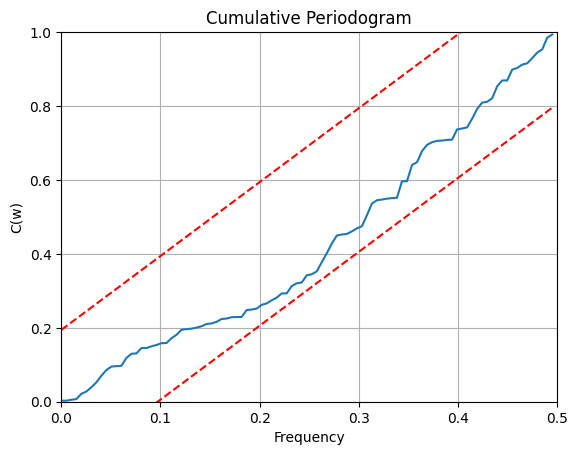

In [12]:
# Here it looks like there is a significant correlation in lag 1 and 2. Hence, we estimate AR(2)
A1 = [1, 1,1]
model_result = modelling.estimateARMA(y1, A=A1)

Here we see that our simulated data can be reasonably predicted using an AR(2) model since, the monti-test and cumulative periodogram shows that the residuals are white.

In [13]:
model_result.FPE

1.0195125281373845

## Question 4

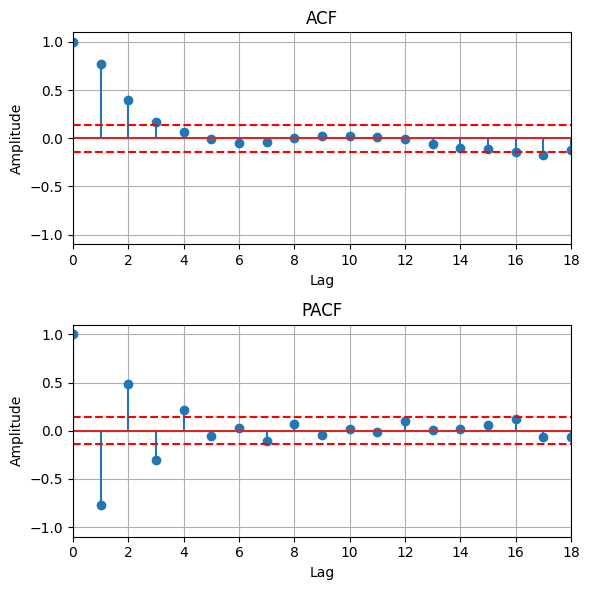

In [14]:
data = pd.read_csv('./data/data.dat', header=None,names=['y'])['y'].values.tolist()
analysis.plotACFnPACF(data)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.7723(±0.0451)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 36.13%
FPE : 1.772  MSE : 1.755
AIC : 678.674   BIC : 681.968



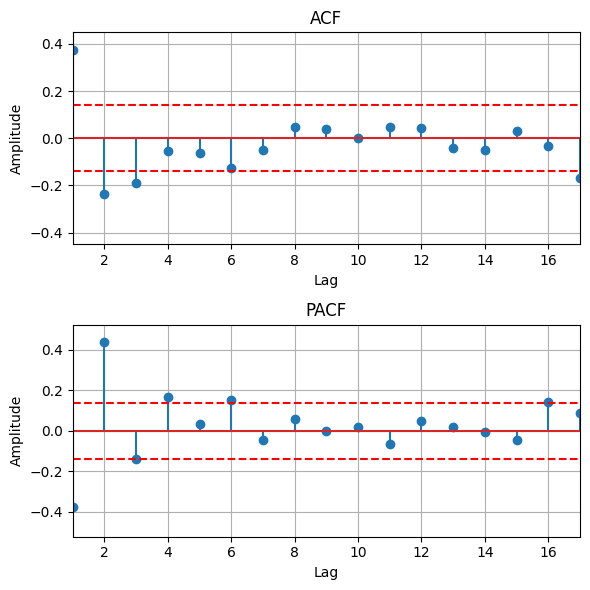

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 66.71 < 31.41)
  McLeod-Li test:        True (white if 23.52 < 31.41)
  Monti test:            False (white if 91.54 < 31.41)
  Sign change test:      False (white if 0.36 in [0.43,0.57])


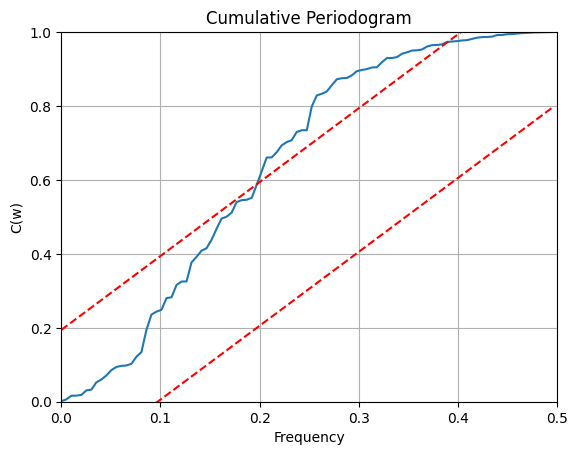

In [15]:
# For AR(1)
A=1
model_result_ar1 =modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.1466(±0.0621)·z⁻¹ + 0.4861(±0.0621)·z⁻²

Polynomial orders: nA = 2
Number of free coefficients: 2
Fit to estimation data (NRMSE): 44.03%
FPE : 1.373  MSE : 1.347
AIC : 624.947   BIC : 631.524



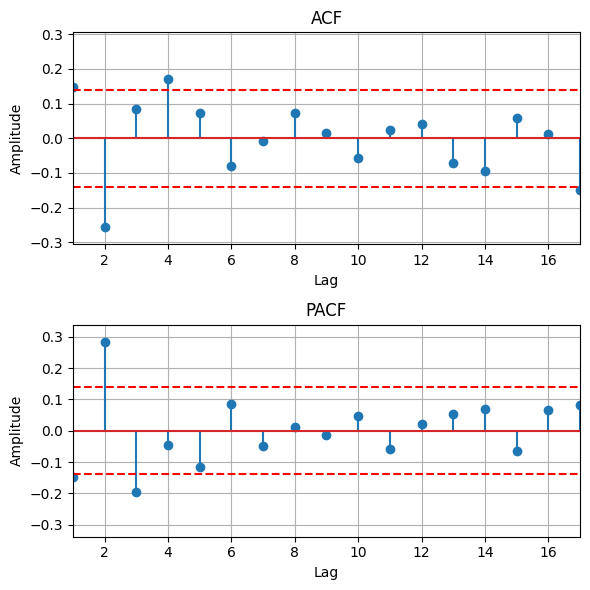

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 42.84 < 31.41)
  McLeod-Li test:        True (white if 24.44 < 31.41)
  Monti test:            False (white if 41.39 < 31.41)
  Sign change test:      True (white if 0.45 in [0.43,0.57])


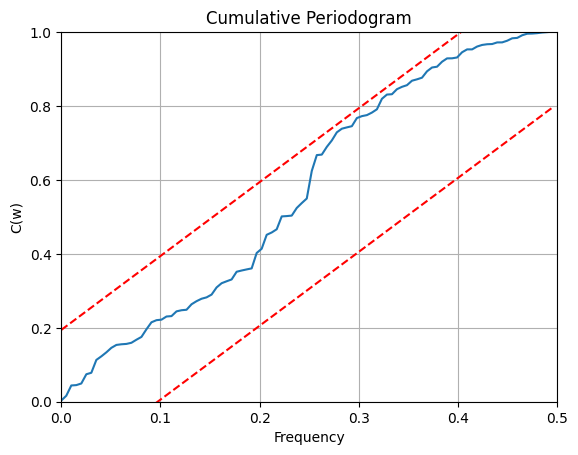

In [16]:
# For AR(2)
A=2
model_result_ar2 = modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.2952(±0.0678)·z⁻¹ + 0.8365(±0.098)·z⁻² - 0.306(±0.0681)·z⁻³

Polynomial orders: nA = 3
Number of free coefficients: 3
Fit to estimation data (NRMSE): 46.62%
FPE : 1.262  MSE : 1.226
AIC : 605.172   BIC : 615.022



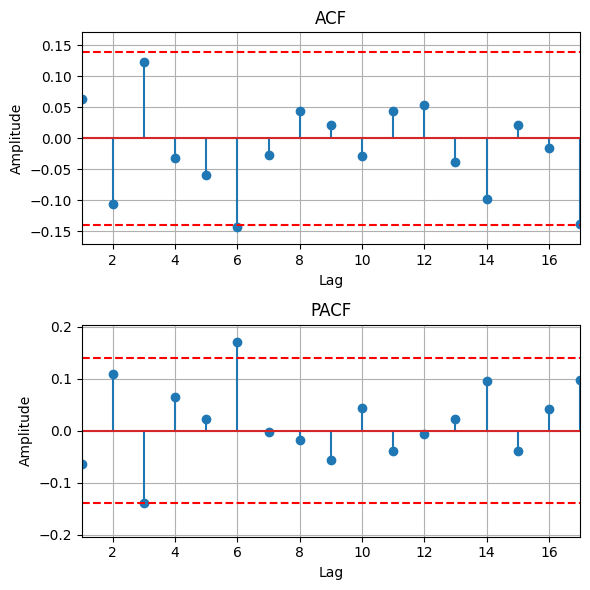

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 21.90 < 31.41)
  McLeod-Li test:        True (white if 17.40 < 31.41)
  Monti test:            True (white if 22.66 < 31.41)
  Sign change test:      True (white if 0.46 in [0.43,0.57])


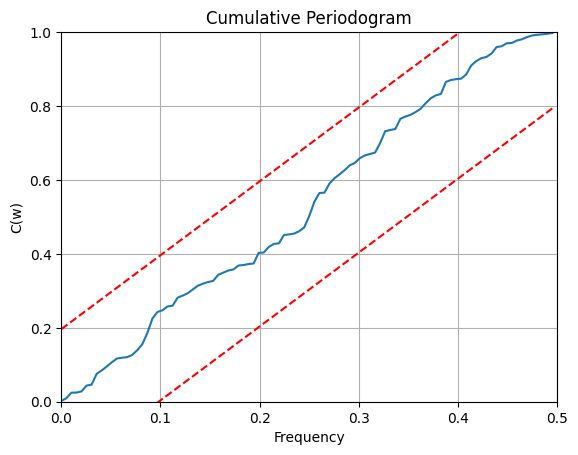

In [17]:
# For AR(3)
A=3
model_result_ar3 = modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.3593(±0.0695)·z⁻¹ + 1.015(±0.1117)·z⁻² - 0.5902(±0.1118)·z⁻³ + 0.221(±0.0698)·z⁻⁴

Polynomial orders: nA = 4
Number of free coefficients: 4
Fit to estimation data (NRMSE): 47.91%
FPE : 1.213  MSE : 1.167
AIC : 594.522   BIC : 607.635



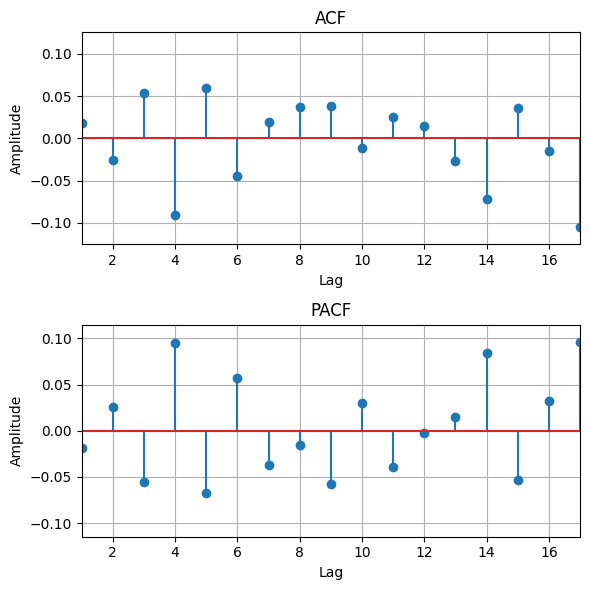

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 10.33 < 31.41)
  McLeod-Li test:        True (white if 15.85 < 31.41)
  Monti test:            True (white if 13.22 < 31.41)
  Sign change test:      True (white if 0.47 in [0.43,0.57])


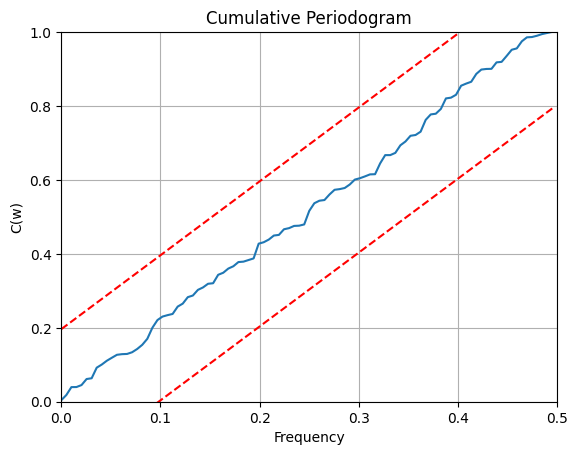

In [18]:
# For AR(4)
A=4
model_result_ar4 = modelling.estimateARMA(data, A=A)

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 1.3793(±0.071)·z⁻¹ + 1.0545(±0.1189)·z⁻² - 0.6496(±0.1325)·z⁻³ + 0.3027(±0.1189)·z⁻⁴ - 0.0596(±0.0713)·z⁻⁵

Polynomial orders: nA = 5
Number of free coefficients: 5
Fit to estimation data (NRMSE): 48.18%
FPE : 1.215  MSE : 1.155
AIC : 591.534   BIC : 607.899



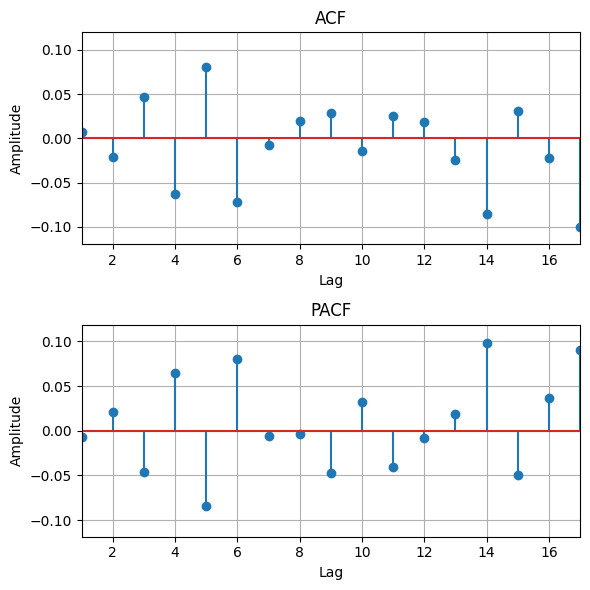

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 10.72 < 31.41)
  McLeod-Li test:        True (white if 17.12 < 31.41)
  Monti test:            True (white if 13.11 < 31.41)
  Sign change test:      True (white if 0.48 in [0.43,0.57])


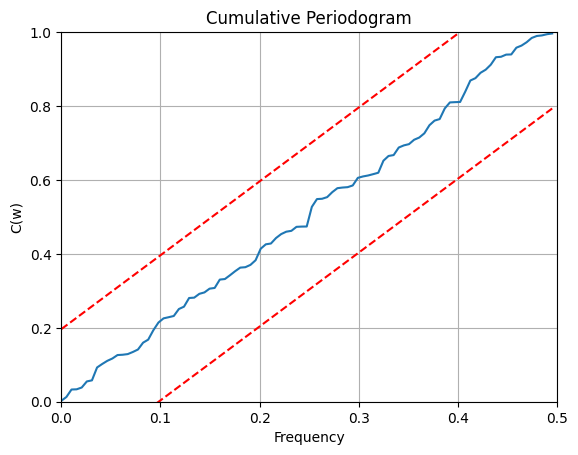

In [19]:
# For AR(5)
A=5
model_result_ar5 = modelling.estimateARMA(data, A=A)

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 0.4667(±0.1121)·z⁻¹
C(z) = 1.0 + 0.9169(±0.123)·z⁻¹ + 0.1738(±0.1162)·z⁻²

Polynomial orders: nA = 1    nC = 2
Number of free coefficients: 3
Fit to estimation data (NRMSE): 48.35%
FPE : 1.182  MSE : 1.148
AIC : 598.128   BIC : 608.008



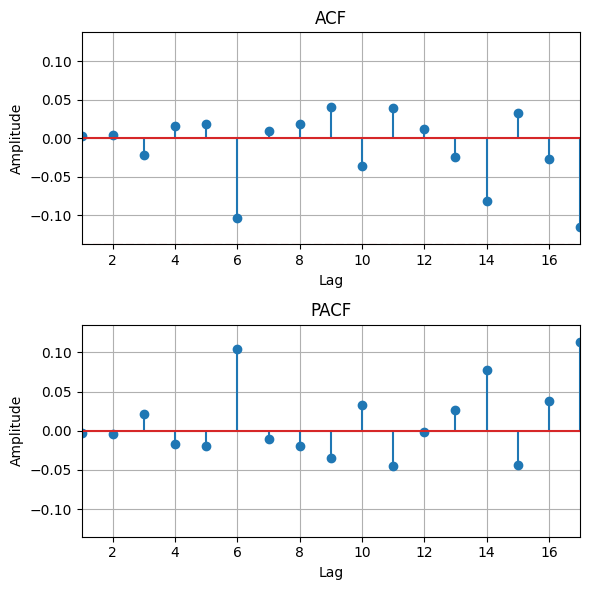

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 10.95 < 31.41)
  McLeod-Li test:        True (white if 22.07 < 31.41)
  Monti test:            True (white if 10.68 < 31.41)
  Sign change test:      True (white if 0.48 in [0.43,0.57])


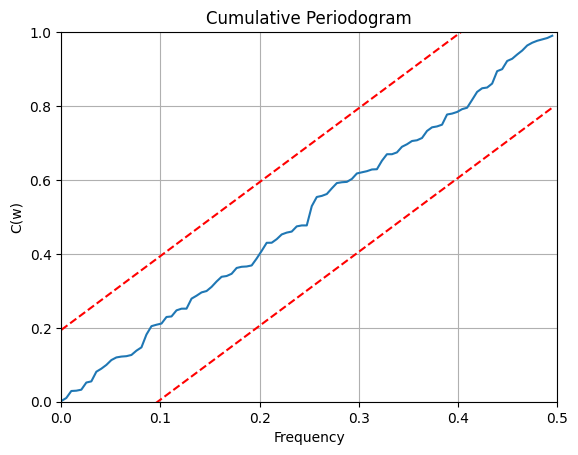

In [20]:
# For ARMA(1,2)
A=1
C= 2
model_result_ar1_ma2 = modelling.estimateARMA(data, A=A,C=C)

I would chose AR(3) as after checking the ACF and PACF of AR(2), I would have increased the order of the A-coefficient to 3 after still observing a bump in lag 3 in the PACF of AR(2). After observing the ACF and PACF of AR(3), it seems reasonably white for both, and it also passed the Monti-test and sign change test.

## Question 5

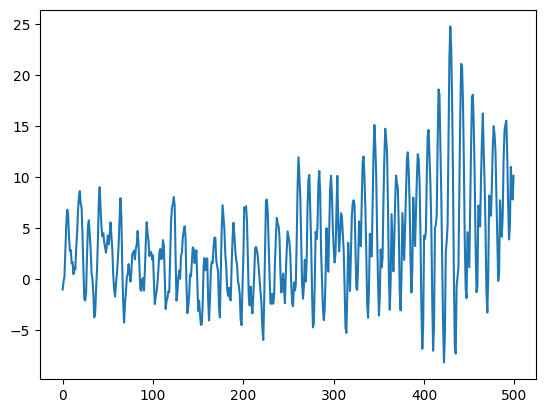

In [21]:
random.seed(0)
A = [1, -1.5, 0.7 ] ;
C = [1]+ [0]*11 + [-0.5];
A12 = [1] + [0]*11 +[-1];
A_star = np.convolve(A, A12 ) ;
e = np.random.randn(600) ;
y = modelling.filter(C,A_star,e, remove=100)
plt.plot(y)

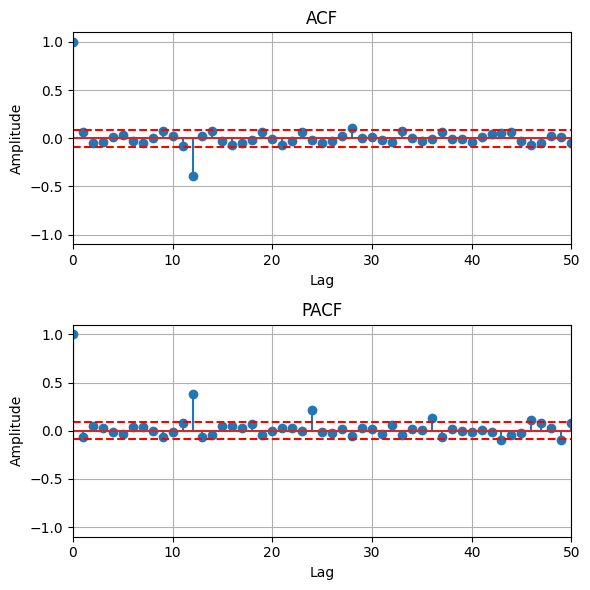

In [22]:
y_s = modelling.filter(A12,1,y, remove=len(A12)-1)
ordA=2
ordC=0
model = modelling.PEM(y_s, A=ordA, C=ordC)
# if not isinstance(A, int): A_free = np.array(ordA).astype(bool)
# if not isinstance(C, int): C_free = np.array(ordC).astype(bool)
model.set_free_params(A_free=[1, 1,1], C_free=[1])
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
analysis.plotACFnPACF(res,noLags=50,titleStr=None)

Here we still observe a significant value in lag 12 in the ACF. Which shows that the ACF and PACF is not white. Hence we proceed by including the parameter c12

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 1.4768(±0.0318)·z⁻¹ + 0.7131(±0.0319)·z⁻²
C(z) = 1.0 - 0.5456(±0.039)·z⁻¹²

Polynomial orders: nA = 2    nC = 12
Number of free coefficients: 3
Fit to estimation data (NRMSE): 66.2%
FPE : 1.059  MSE : 1.052
AIC : 1409.716   BIC : 1422.274



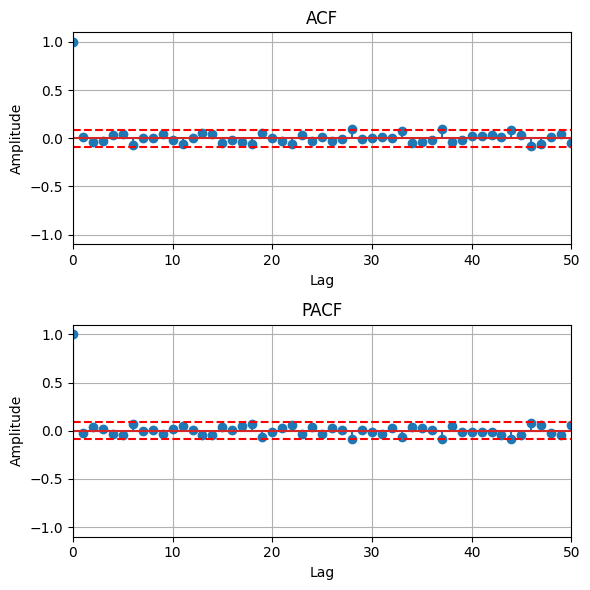

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 15.46 < 31.41)
  McLeod-Li test:        True (white if 19.55 < 31.41)
  Monti test:            True (white if 15.28 < 31.41)
  Sign change test:      True (white if 0.49 in [0.46,0.54])


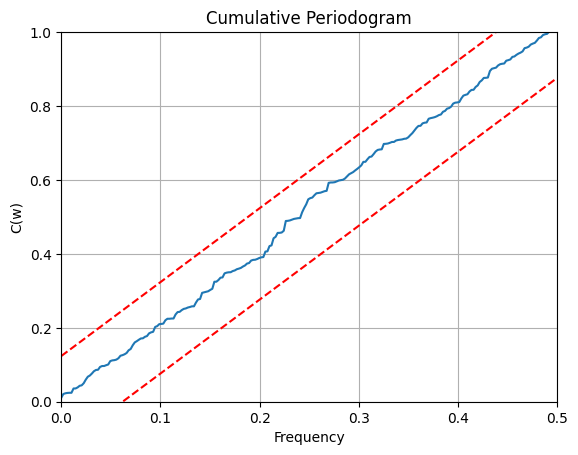

In [23]:
ordA=2
ordC=[1] + [0]*11 + [1]
model = modelling.PEM(y_s, A=ordA, C=ordC)

model.set_free_params(A_free=[1, 1,1], C_free=ordC)
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
model_fitted.summary()
acf_est, pacf_est = analysis.plotACFnPACF(res,noLags=50,titleStr=None, return_val=True)
tests.whiteness_test(res)

Here the ACF and PACF looks reasonably gaussian and our tests supports this argument. Looks like we were able to make a good estimate of our data (about 68%). However, the real value of the parameters is not within the confidence interval generated here.

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


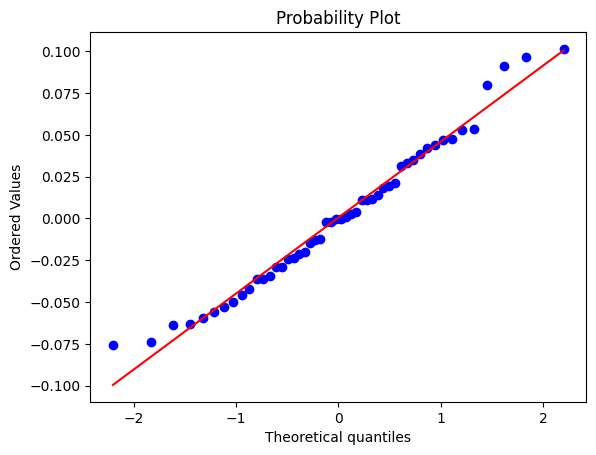

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


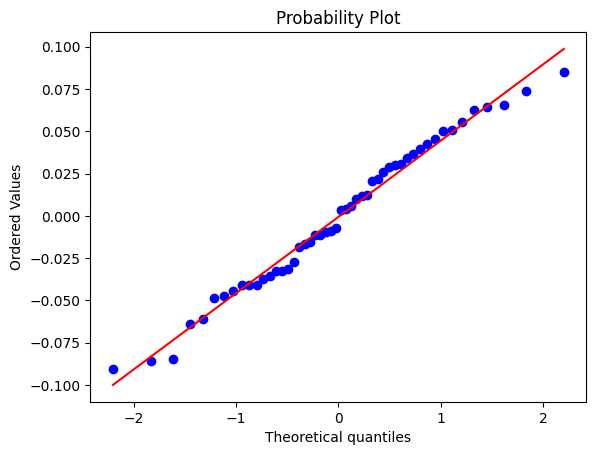

In [24]:
tests.check_if_normal(acf_est[1:])
stats.probplot(acf_est[1:], dist="norm", plot=pylab)
pylab.show()
tests.check_if_normal(pacf_est[1:])
stats.probplot(pacf_est[1:], dist="norm", plot=pylab)
pylab.show()

Here it can be seen that the ACF and PACF looks normal and passes the normal test. We can conclude that it is enough to remove the seasonal components and the parameter estimates are significant.

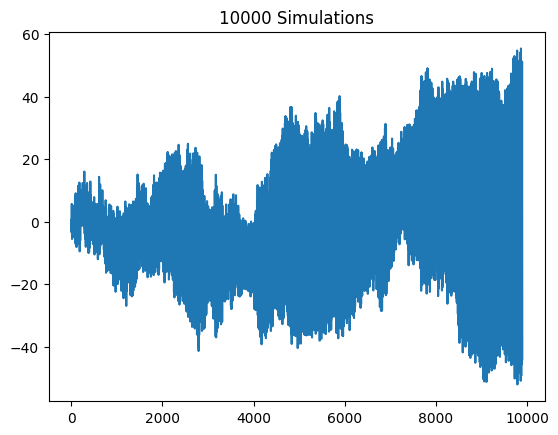

In [25]:
random.seed(0)
N = 10000
# A = [1, -1.5, 0.7 ] ;
# C = [1]+ [0]*11 + [-0.5];
# A12 = [1] + [0]*11 +[-1];
# A_star = np.convolve(A, A12 ) ;
e = np.random.randn(N) ;
y_N = modelling.filter(C,A_star,e, remove=100)
plt.plot(y_N)
plt.title(f'{N} Simulations')
plt.show()

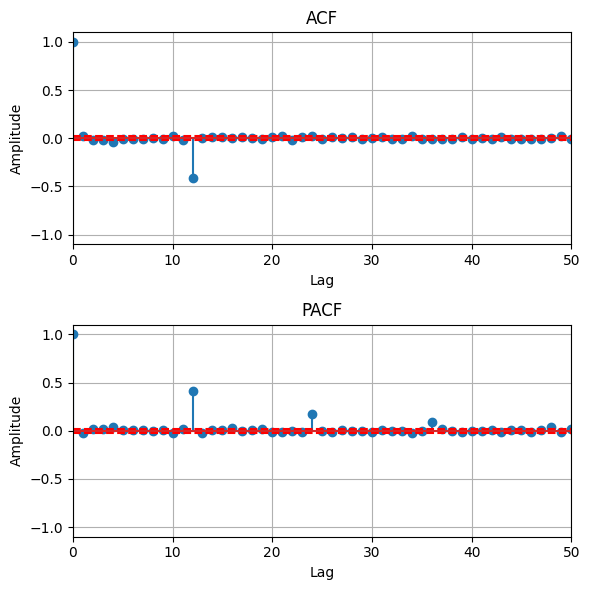

In [26]:
y_N_s = modelling.filter(A12,1,y_N, remove=len(A12)-1)
ordA=2
ordC=0
model = modelling.PEM(y_N_s, A=ordA, C=ordC)

model.set_free_params(A_free=[1, 1,1], C_free=[1])
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
analysis.plotACFnPACF(res,noLags=50,titleStr=None)

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 1.5089(±0.0071)·z⁻¹ + 0.7084(±0.0071)·z⁻²
C(z) = 1.0 - 0.5059(±0.0087)·z⁻¹²

Polynomial orders: nA = 2    nC = 12
Number of free coefficients: 3
Fit to estimation data (NRMSE): 69.93%
FPE : 0.992  MSE : 0.992
AIC : 27977.694   BIC : 27999.29



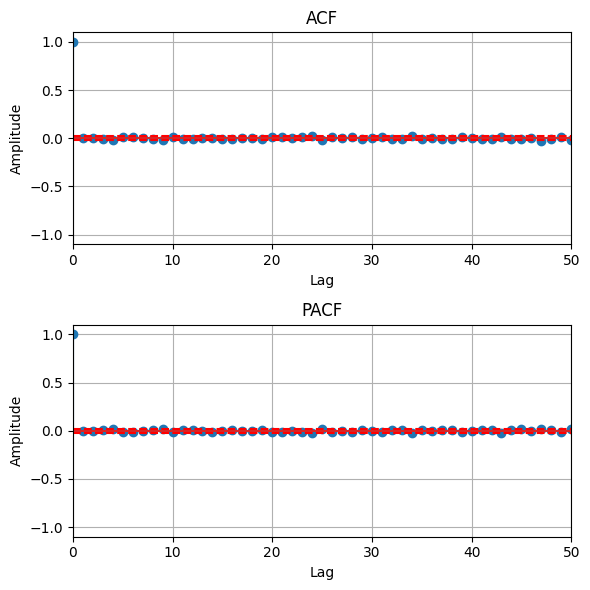

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 18.34 < 31.41)
  McLeod-Li test:        True (white if 29.73 < 31.41)
  Monti test:            True (white if 18.63 < 31.41)
  Sign change test:      True (white if 0.50 in [0.49,0.51])


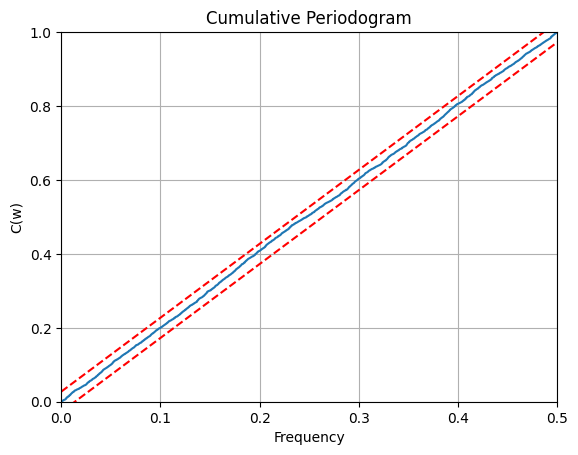

In [27]:
ordA=2
ordC=[1] + [0]*11 + [1]
model = modelling.PEM(y_N_s, A=ordA, C=ordC)

model.set_free_params(A_free=[1, 1,1], C_free=ordC)
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
model_fitted.summary()
acf_est, pacf_est = analysis.plotACFnPACF(res,noLags=50,titleStr=None, return_val=True)
tests.whiteness_test(res)

After using N=10,000 samples our estimate is closer to our value. However, the confidence interval still does not contain the true value of the parameter. 

We can check everything together by performing polynomial multiplication and include the parameters that exist together. \
i.e. if $(1-a_{12})(1-a_1-a_2)$, we check parameters $a_1, a_2, a_{12}, a_{13}, a_{14}$ together.

## Question 6

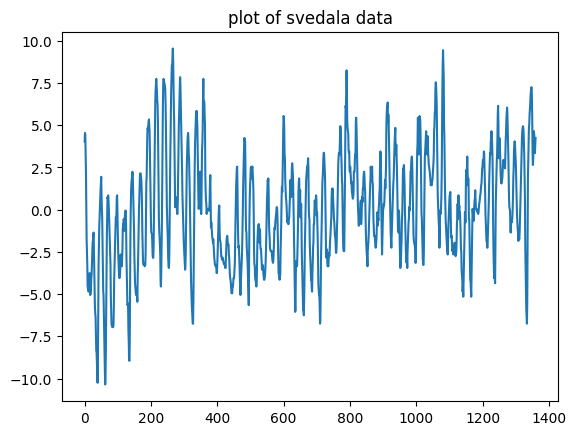

In [28]:
svedala = analysis.mat2np('./data/svedala.mat')
plt.plot(svedala)
plt.title('plot of svedala data')
plt.show()

Here, the variance seems to be constant and the mean seems to sit at 0 indicating that there might not be a trend.

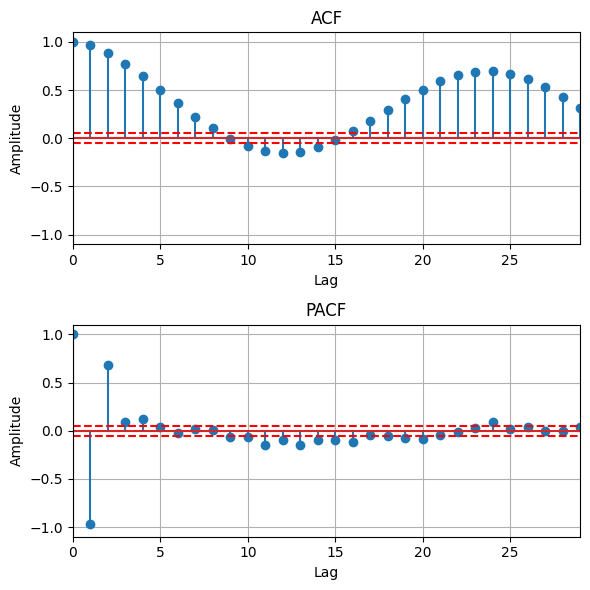

In [29]:
analysis.plotACFnPACF(svedala)

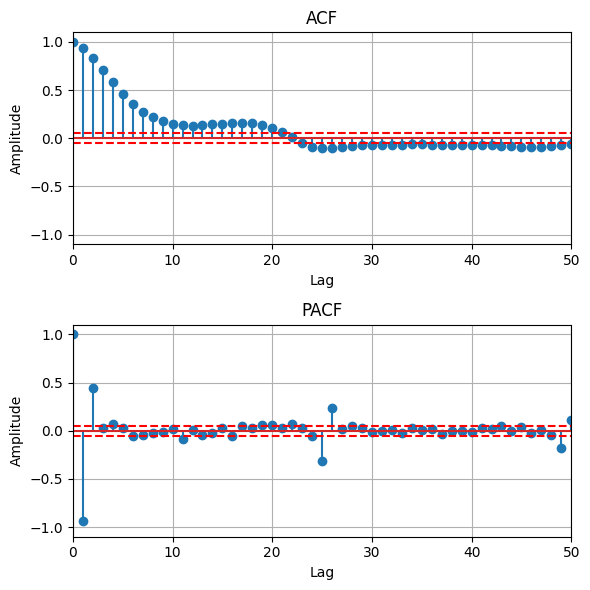

Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.7259(±0.0191)·z⁻²⁴

Polynomial orders: nA = 24
Number of free coefficients: 1
Fit to estimation data (NRMSE): 30.83%
FPE : 5.361  MSE : 5.363
AIC : 6041.77   BIC : 6046.968



In [30]:
# Here we observe a clear season in the ACF. Hence, we begin by removing the season by removing the a12 parameter.

ordA=[1] + [0]*23 + [1]
ordC=0
model = modelling.PEM(svedala, A=ordA, C=ordC)

model.set_free_params(A_free=ordA, C_free=[1])
model_fitted = model.fit(method='LS', bh=False)
svedala_n = model_fitted.resid
analysis.plotACFnPACF(svedala_n,noLags=50,titleStr=None)
model_fitted.summary()

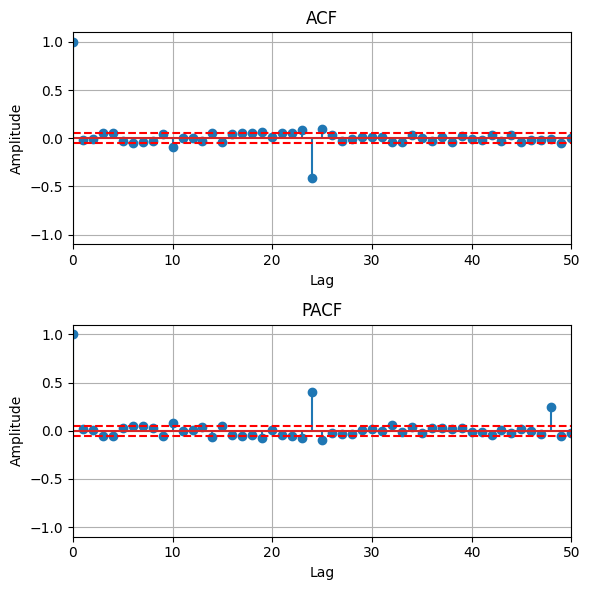

In [31]:
# We observe a significant lag at 12 in the ACF. Hence we try adding a c12 term
ordA=[1,1,1]
ordC=0
model = modelling.PEM(svedala_n, A=ordA, C=ordC)

model.set_free_params(A_free=ordA, C_free=[1])
model_fitted = model.fit(method='LS', bh=False)
svedala_n2 = model_fitted.resid
analysis.plotACFnPACF(svedala_n2,noLags=50,titleStr=None)

Discrete-time MA model: y(t) = C(z)e(t)

C(z) = 1.0 - 0.4859(±0.0242)·z⁻²⁴

Polynomial orders: nC = 24
Number of free coefficients: 1
Fit to estimation data (NRMSE): 11.07%
FPE : 0.372  MSE : 0.372
AIC : 2469.803   BIC : 2474.999



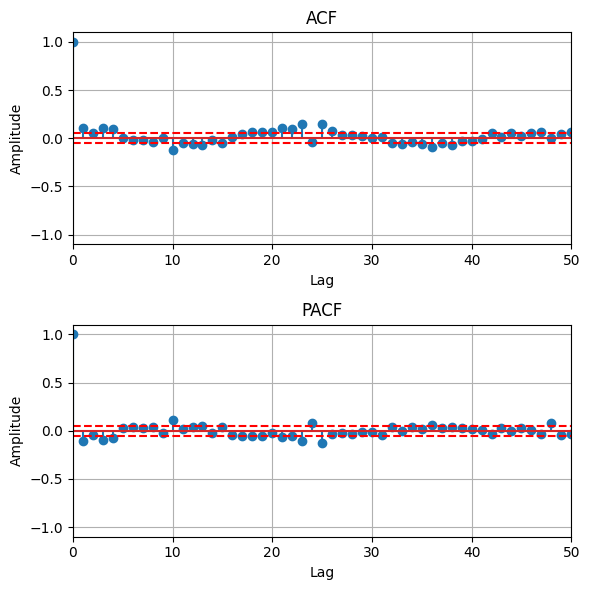

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 110.19 < 31.41)
  McLeod-Li test:        False (white if 63.82 < 31.41)
  Monti test:            False (white if 84.95 < 31.41)
  Sign change test:      False (white if 0.42 in [0.47,0.53])


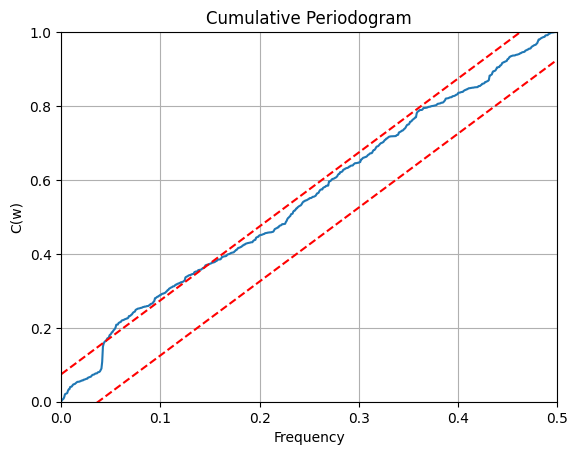

In [32]:
# We still observe a 24 lag in the PACF, hence we include a c24
ordA=0
ordC=[1] + [0]*23 + [1]
model = modelling.PEM(svedala_n2, A=ordA, C=ordC)

model.set_free_params(A_free=[1], C_free=ordC)
model_fitted = model.fit(method='LS', bh=False)
svedala_n3 = model_fitted.resid
model_fitted.summary()
analysis.plotACFnPACF(svedala_n3,noLags=50,titleStr=None)
tests.whiteness_test(svedala_n3)

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 1.4358(±0.0238)·z⁻¹ + 0.4893(±0.0238)·z⁻² - 0.899(±0.0249)·z⁻²⁴ + 1.243(±0.0512)·z⁻²⁵ - 0.3907(±0.0321)·z⁻²⁶
C(z) = 1.0 - 0.8147(±0.0333)·z⁻²⁴

Polynomial orders: nA = 26    nC = 24
Number of free coefficients: 6
Fit to estimation data (NRMSE): 82.86%
FPE : 0.332  MSE : 0.33
AIC : 2318.541   BIC : 2349.721



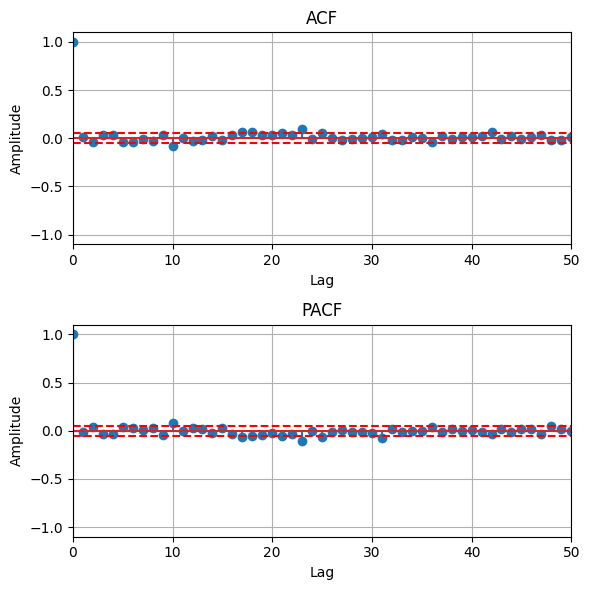

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 38.17 < 31.41)
  McLeod-Li test:        False (white if 67.74 < 31.41)
  Monti test:            False (white if 38.90 < 31.41)
  Sign change test:      True (white if 0.48 in [0.47,0.53])


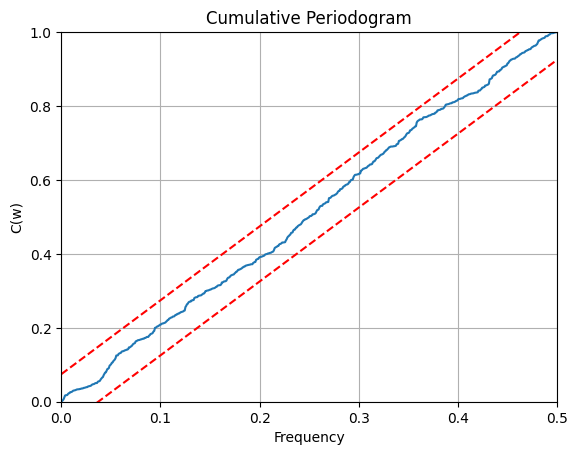

In [33]:
# We try estimating all the parameters at once
ordA=[1,1,1] + [0]*21 + [1,1,1]
ordC=[1] + [0]*23 + [1]
model = modelling.PEM(svedala, A=ordA, C=ordC)

model.set_free_params(A_free=ordA, C_free=ordC)
model_fitted = model.fit(method='LS', bh=False)
res = model_fitted.resid
model_fitted.summary()
analysis.plotACFnPACF(res,noLags=50,titleStr=None)
tests.whiteness_test(res)

The D'Agostino-Pearson K2 test indicates that the data is NOT normal distributed.


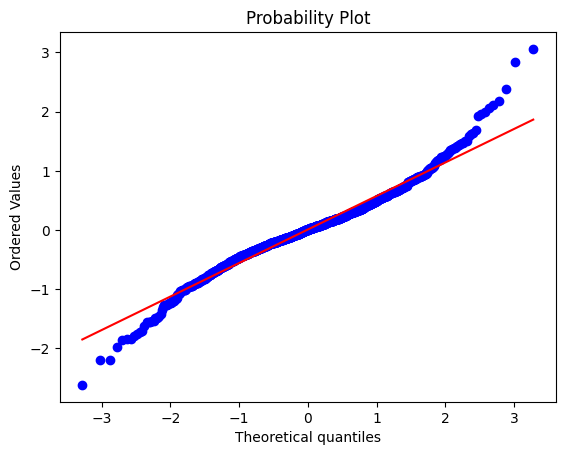

In [34]:
tests.check_if_normal(res)
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

Here, since the residual qqplot shows that the data is not gaussian, the whiteness tests boundary will be different, indicating that the tests might follow if we used the right distribution. And since, the periodogram agrees that the residuals are white; we can conclude that the residual is reasonably white.